<a href="https://colab.research.google.com/github/lpoggetto/trabalho_final_DL_fiap/blob/main/trabalho_final_deep_learningCSNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando os pacotes utilizados

In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, f1_score, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import CategoricalAccuracy, AUC, Precision, Recall

import warnings
warnings.filterwarnings('ignore')

### Lendo os arquivos csv com as cotações históricas

In [171]:
df_treino=pd.read_csv(
    'https://raw.githubusercontent.com/lpoggetto/trabalho_final_DL_fiap/refs/heads/main/CSNA3.SA/treino.csv',
    index_col = 'Unnamed: 0')

df_teste=pd.read_csv(
    'https://raw.githubusercontent.com/lpoggetto/trabalho_final_DL_fiap/refs/heads/main/CSNA3.SA/teste.csv',
    index_col = 'Unnamed: 0')


### Criando visualização para avaliar a cotação histórica

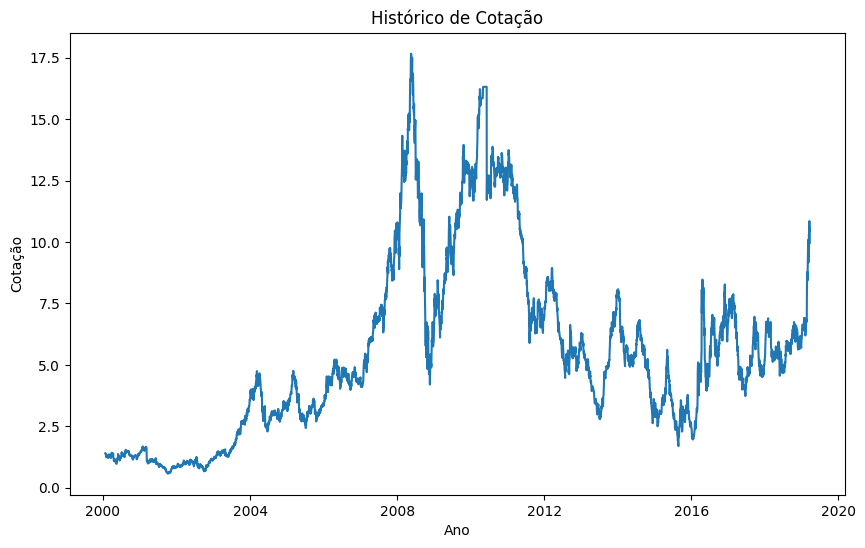

In [90]:
#carregar o dataset de treino e Teste
treino_ds = df_treino
teste_ds = df_teste

colunas = ['Date',
           'Close',
           'Label']

#selecionar as features que interessam
treino_ds = treino_ds[colunas]
treino_ds.loc[:, 'Type'] = 'Train'
teste_ds = teste_ds[colunas]
teste_ds.loc[:, 'Type'] = 'Test'

#unir os dataframes
frames = [treino_ds, teste_ds]
final_ds = pd.concat(frames)

#converter a data para o formato correto
final_ds['Date'] = pd.to_datetime(treino_ds['Date'])
final_ds['Close'] = treino_ds['Close'].astype('float32')

# Verificar o histórico de cotação - base treino
plt_ds = final_ds[['Date','Close']]

plt.figure(figsize=(10, 6))
plt.plot(plt_ds[['Date']],plt_ds[['Close']])
plt.title('Histórico de Cotação')
plt.xlabel('Ano')
plt.ylabel('Cotação')
plt.show();

### Pré processamento - Dados de treino

In [181]:
# Separando em X e y
X_treino = df_treino[[col for col in df_treino.columns if 'Past' in col]].values
y_treino = df_treino_filtrado['Label'].values

X_teste = df_teste[[col for col in df_teste.columns if 'Past' in col]].values
y_teste = df_teste['Label'].values

In [185]:
# aplicando o reshape no df
# [amostras, time_step, features]

time_steps = X_treino.shape[1]
X_treino = np.reshape(X_treino, (X_treino.shape[0], time_steps, 1))

In [205]:
# Definindo o modelo

model = Sequential()
model.add(LSTM(16, activation='relu', return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(8, activation='relu'))
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[CategoricalAccuracy(),
                       'accuracy',
                       AUC(),
                       Precision(),
                       Recall()])

In [206]:
model.fit(X_treino,
          y_treino,
          epochs=10,
          verbose=1)

Epoch 1/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.0069 - auc_11: 0.0000e+00 - categorical_accuracy: 0.4953 - loss: -1.3753 - precision_11: 1.0000 - recall_11: 0.0131
Epoch 2/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.0000e+00 - auc_11: 0.0000e+00 - categorical_accuracy: 0.4184 - loss: -2.1284 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 3/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0000e+00 - auc_11: 0.0000e+00 - categorical_accuracy: 0.4851 - loss: -2.0101 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 4/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0000e+00 - auc_11: 0.0000e+00 - categorical_accuracy: 0.5874 - loss: -2.2125 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 5/10
149/149 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.0000e+00 - auc_11: 0.0000e+00 - categorical_accuracy: 0.4597 - loss: -1.7144 - precision_11: 0.0000e+00 - recall_11: 0.0000e+00
Epoch 6/10
149/149 ━━━━━━━━━━━━━━━━━━

In [208]:
y_pred = model.predict(X_teste)

y_pred_classes = np.where(y_pred > 0, 1, -1)

cm = confusion_matrix(y_teste, y_pred_classes, labels=[-1,1])

cm

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


array([[553, 135],
       [397, 101]])